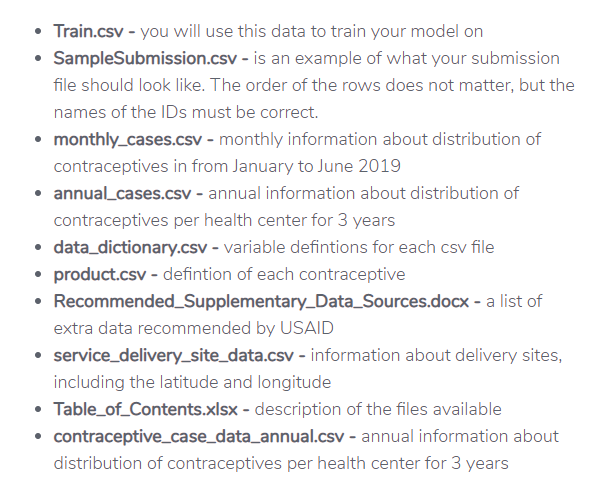

In [1382]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## Loading dataset

In [1383]:
train=pd.read_csv(r'D:\Downloads\zindi\Train.csv')
sample=pd.read_csv(r'D:\Downloads\zindi\SampleSubmission.csv')

data_dictionary=pd.read_csv(r'D:\Downloads\zindi\data_dictionary.csv')
data_dictionary

In [1384]:
set(train.product_code)

{'AS17005',
 'AS21126',
 'AS27000',
 'AS27132',
 'AS27133',
 'AS27134',
 'AS27137',
 'AS27138',
 'AS27139',
 'AS42018',
 'AS46000'}

In [1385]:
train.shape

(35753, 14)

In [1386]:
train.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


In [1387]:
train.isnull().sum()

year                             0
month                            0
region                           0
district                         0
site_code                        0
product_code                     0
stock_initial                    0
stock_received                   0
stock_distributed                0
stock_adjustment                 0
stock_end                        0
average_monthly_consumption      0
stock_stockout_days              0
stock_ordered                  763
dtype: int64

In [1388]:
train.loc[(train.stock_end==0)&(train.stock_ordered==0),'stock_ordered']=np.NaN

In [1389]:
train.describe(exclude='number')

,region,district,site_code,product_code
count,35753,35753,35753,35753
unique,20,80,155,11
top,ABIDJAN 2,KOUMASSI-PORT BOUET-VRIDI,C1015,AS27133
freq,6504,2315,416,5368


In [1390]:
train.describe()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
count,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.0,29601.000000
mean,2017.433782,6.169412,63.245518,14.846055,14.764327,0.961150,64.288395,14.606439,0.0,31.511334
std,1.019933,3.429079,168.661538,70.631782,39.848242,37.883099,170.848479,32.521384,0.0,115.855609
min,2016.000000,1.000000,0.000000,0.000000,0.000000,-1440.000000,0.000000,0.000000,0.0,0.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,2017.000000,6.000000,12.000000,0.000000,1.000000,0.000000,13.000000,3.000000,0.0,0.000000
75%,2018.000000,9.000000,69.000000,0.000000,13.000000,0.000000,70.000000,16.000000,0.0,27.000000
max,2019.000000,12.000000,4320.000000,3534.000000,1728.000000,3003.000000,4320.000000,864.000000,0.0,10240.000000


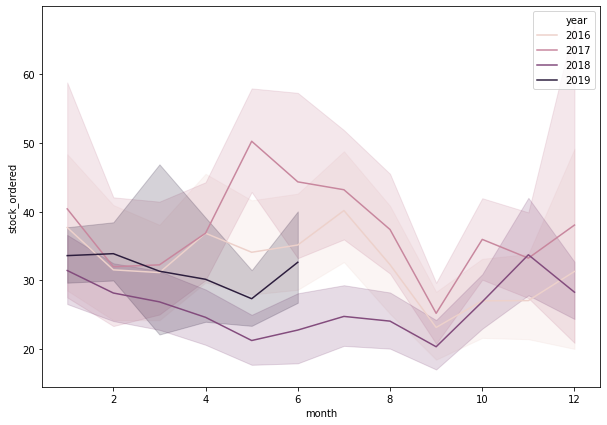

In [1391]:
plt.figure(figsize=(10,7))
sns.lineplot(x='month',y='stock_ordered',data=train,hue='year')

In [1392]:
cat_features=['site_code','product_code']

## Data cleaning

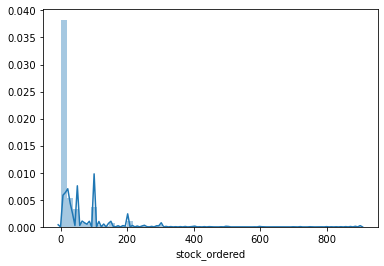

In [1393]:
sns.distplot(train.loc[train.stock_ordered<1000].stock_ordered)

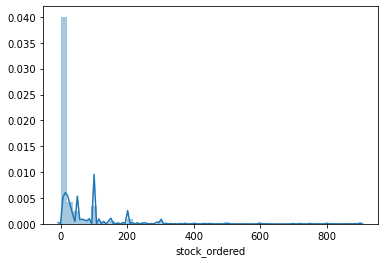

In [1394]:
sns.distplot(train.loc[(train.year==2016)&(train.stock_ordered<1000)].stock_ordered)

train=train.loc[train.stock_ordered<200]

## Adding lag feature

In [1397]:
_16=train.loc[train.year==2016,['year','month','site_code','product_code','stock_ordered']]
_17=train.loc[train.year==2017,['year','month','site_code','product_code','stock_ordered']]
_18=train.loc[train.year==2018,['year','month','site_code','product_code','stock_ordered']]
_19=train.loc[train.year==2019,['year','month','site_code','product_code','stock_ordered']]

In [1398]:
_17.head()

,year,month,site_code,product_code,stock_ordered
17366,2017,1,C4001,AS27000,0.0
17367,2017,1,C4001,AS27133,0.0
17368,2017,1,C4001,AS27132,0.0
17369,2017,1,C4001,AS27134,0.0
17370,2017,1,C4001,AS27137,0.0


In [1399]:
_=['month','site_code','product_code','stock_ordered']

In [1400]:
_17=_17.merge(_16[_],on=['month','site_code','product_code'],how='left')
_17.columns=['year','month','site_code','product_code','stock_ordered','lag']

In [1401]:
_18=_18.merge(_17[_],on=['month','site_code','product_code'],how='left')
_18.columns=['year','month','site_code','product_code','stock_ordered','lag']

In [1402]:
_19=_19.merge(_18[_],on=['month','site_code','product_code'],how='left')
_19.columns=['year','month','site_code','product_code','stock_ordered','lag']

In [1403]:
_18.head()

,year,month,site_code,product_code,stock_ordered,lag
0,2018,1,C4023,AS27000,60.0,0.0
1,2018,1,C4023,AS27133,100.0,0.0
2,2018,1,C4001,AS27132,0.0,0.0
3,2018,1,C4001,AS27134,0.0,0.0
4,2018,1,C4001,AS27133,25.0,0.0


In [1404]:
train=pd.concat((_17,_18,_19),axis=0)
train.index=list(range(len(train)))
train.head()

,year,month,site_code,product_code,stock_ordered,lag
0,2017,1,C4001,AS27000,0.0,0.0
1,2017,1,C4001,AS27133,0.0,195.0
2,2017,1,C4001,AS27132,0.0,0.0
3,2017,1,C4001,AS27134,0.0,0.0
4,2017,1,C4001,AS27137,0.0,0.0


In [1405]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27722 entries, 0 to 27721
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           27722 non-null  int64  
 1   month          27722 non-null  int64  
 2   site_code      27722 non-null  object 
 3   product_code   27722 non-null  object 
 4   stock_ordered  23176 non-null  float64
 5   lag            18641 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [1408]:
site=pd.read_csv(r'D:\Downloads\zindi\service_delivery_site_data.csv')
site.head()

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


In [1409]:
train=train.merge(site,on='site_code',how='left')

In [1410]:
train.isnull().sum()

year              0
month             0
site_code         0
product_code      0
stock_ordered     0
lag               0
site_type         0
site_region       0
site_district     0
site_latitude     0
site_longitude    0
dtype: int64

In [1411]:
train.lag.fillna(0,inplace=True)
train.dropna(inplace=True)

In [1412]:
gr1=['AS27139','AS27138','AS46000','AS27132','AS27137']
gr2=['AS27000','AS27134']
gr3=['AS42018','AS17005','AS21126']
gr4=['AS27133']

In [1489]:
mask1=[product in gr1 for product in train.product_code]
mask2=[product in gr2 for product in train.product_code]
mask3=[product in gr3 for product in train.product_code]
mask4=[product in gr4 for product in train.product_code]
train1=train.loc[mask1]
train2=train.loc[mask2]
train3=train.loc[mask3]
train4=train.loc[mask4]

## Preparing test data
both, for final submission and for validation

In [1490]:
test1=[]
for i in sample.ID.values:
    test1.append(i.split(' X '))

In [1491]:
test1=pd.DataFrame(test1,columns=['year','month','site_code','product_code'])
test1['ID']=sample.ID
test1.month=test1.month.map(int)

test2=test1.copy()
test2.month.replace({7:10,8:11,9:12},inplace=True)

test1=test1.merge(_18[_],on=['month','site_code','product_code'],how='left')
test1.columns=['year','month','site_code','product_code','ID','lag']
test1.head()

,year,month,site_code,product_code,ID,lag
0,2019,7,C4001,AS21126,2019 X 7 X C4001 X AS21126,NaN
1,2019,7,C4001,AS27134,2019 X 7 X C4001 X AS27134,0.0
2,2019,7,C4001,AS27132,2019 X 7 X C4001 X AS27132,20.0
3,2019,7,C4001,AS27000,2019 X 7 X C4001 X AS27000,6.0
4,2019,7,C4001,AS27137,2019 X 7 X C4001 X AS27137,0.0


In [1492]:
test2=test2.merge(_18[_],on=['month','site_code','product_code'],how='left')
test2.columns=['year','month','site_code','product_code','ID','lag']
test2.head()

,year,month,site_code,product_code,ID,lag
0,2019,10,C4001,AS21126,2019 X 7 X C4001 X AS21126,NaN
1,2019,10,C4001,AS27134,2019 X 7 X C4001 X AS27134,0.0
2,2019,10,C4001,AS27132,2019 X 7 X C4001 X AS27132,NaN
3,2019,10,C4001,AS27000,2019 X 7 X C4001 X AS27000,0.0
4,2019,10,C4001,AS27137,2019 X 7 X C4001 X AS27137,0.0


In [1493]:
test1=test1.merge(site,on='site_code',how='left')
test2=test2.merge(site,on='site_code',how='left')

In [1494]:
test1.isnull().sum(),test2.isnull().sum()

(year                0
 month               0
 site_code           0
 product_code        0
 ID                  0
 lag               765
 site_type           0
 site_region         0
 site_district       0
 site_latitude       0
 site_longitude      0
 dtype: int64,
 year                0
 month               0
 site_code           0
 product_code        0
 ID                  0
 lag               702
 site_type           0
 site_region         0
 site_district       0
 site_latitude       0
 site_longitude      0
 dtype: int64)

In [1495]:
test1.lag.fillna(0,inplace=True)
test2.lag.fillna(0,inplace=True)

In [1496]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 0 to 3088
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            3089 non-null   object 
 1   month           3089 non-null   int64  
 2   site_code       3089 non-null   object 
 3   product_code    3089 non-null   object 
 4   ID              3089 non-null   object 
 5   lag             3089 non-null   float64
 6   site_type       3089 non-null   object 
 7   site_region     3089 non-null   object 
 8   site_district   3089 non-null   object 
 9   site_latitude   3089 non-null   float64
 10  site_longitude  3089 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 289.6+ KB


In [1497]:
test1.year=test1.year.map(int)
test2.year=test2.year.map(int)

In [1498]:
set(test1.product_code)-set(train.product_code)

set()

In [1499]:
mask1=[product in gr1 for product in test1.product_code]
mask2=[product in gr2 for product in test1.product_code]
mask3=[product in gr3 for product in test1.product_code]
mask4=[product in gr4 for product in test1.product_code]
test11=test1.loc[mask1]
test12=test1.loc[mask2]
test13=test1.loc[mask3]
test14=test1.loc[mask4]

In [1500]:
len(test11)+len(test12)+len(test13)+len(test14)

3089

In [1501]:
mask1=[product in gr1 for product in test2.product_code]
mask2=[product in gr2 for product in test2.product_code]
mask3=[product in gr3 for product in test2.product_code]
mask4=[product in gr4 for product in test2.product_code]
test21=test2.loc[mask1]
test22=test2.loc[mask2]
test23=test2.loc[mask3]
test24=test2.loc[mask4]

In [1502]:
train.shape,test1.shape,sample.shape

((23176, 11), (3089, 11), (3089, 2))

In [1503]:
train.head()

,year,month,site_code,product_code,stock_ordered,lag,site_type,site_region,site_district,site_latitude,site_longitude
0,2017,1,C4001,AS27000,0.0,0.0,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
1,2017,1,C4001,AS27133,0.0,195.0,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,2017,1,C4001,AS27132,0.0,0.0,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
3,2017,1,C4001,AS27134,0.0,0.0,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
4,2017,1,C4001,AS27137,0.0,0.0,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863


## Label encoding

In [1504]:
cat_features=train.columns[train.dtypes==object].drop(['site_code','site_district'])

In [1505]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_features:
    le.fit(train[col])
    test11[col]=le.transform(test11[col])
    test12[col]=le.transform(test12[col])
    test13[col]=le.transform(test13[col])
    test14[col]=le.transform(test14[col])
    
    test21[col]=le.transform(test21[col])
    test22[col]=le.transform(test22[col])
    test23[col]=le.transform(test23[col])
    test24[col]=le.transform(test24[col])
    
    train1[col]=le.transform(train1[col])
    train2[col]=le.transform(train2[col])
    train3[col]=le.transform(train3[col])
    train4[col]=le.transform(train4[col])

In [1506]:
uniquesite=list(set(train.site_code))+list(set(test1.site_code)-set(train.site_code))
uniquedist=list(set(train.site_district))+list(set(test1.site_district)-set(train.site_district))

In [1507]:
len(uniquesite),len(uniquedist)

(156, 81)

In [1508]:
code_4_site=dict(zip(uniquesite,range(len(uniquesite))))
code_4_dist=dict(zip(uniquedist,range(len(uniquedist))))
def label_encoder(dataframe):
    dataframe.site_district.replace(code_4_dist,inplace=True)
    dataframe.site_code.replace(code_4_site,inplace=True)
    return dataframe

In [1509]:
train1=label_encoder(train1.copy())
train2=label_encoder(train2.copy())
train3=label_encoder(train3.copy())
train4=label_encoder(train4.copy())

test11=label_encoder(test11.copy())
test12=label_encoder(test12.copy())
test13=label_encoder(test13.copy())
test14=label_encoder(test14.copy())

test21=label_encoder(test21.copy())
test22=label_encoder(test22.copy())
test23=label_encoder(test23.copy())
test24=label_encoder(test24.copy())

In [1510]:
test11.tail()

,year,month,site_code,product_code,ID,lag,site_type,site_region,site_district,site_latitude,site_longitude
3081,2019,9,14,7,2019 X 9 X C2055 X AS27138,0.0,1,13,13,5.51418,-5.24122
3083,2019,9,153,3,2019 X 9 X C5076 X AS27132,0.0,1,12,80,8.55294,-7.46151
3085,2019,9,153,8,2019 X 9 X C5076 X AS27139,0.0,1,12,80,8.55294,-7.46151
3086,2019,9,153,6,2019 X 9 X C5076 X AS27137,0.0,1,12,80,8.55294,-7.46151
3087,2019,9,153,7,2019 X 9 X C5076 X AS27138,0.0,1,12,80,8.55294,-7.46151


In [1520]:
selected_col=test11.columns.drop(['year','ID']).values #model will build on only these features

## spliting dataset into train and validation
training set contains all data except 2019.

train=pd.concat((train1,train2,train3,train4),axis=0)

In [1522]:
traind=train1.loc[train1.year!=2019]
testd=train1.loc[train1.year==2019]

In [1523]:
traind.shape,testd.shape

((8777, 11), (2590, 11))

In [1524]:
X_train,X_test,y_train,y_test=traind.drop('stock_ordered',axis=1)[selected_col],testd.drop('stock_ordered',axis=1)[selected_col],traind.stock_ordered,testd.stock_ordered

## sckitearn api validation

In [1525]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
lgb=LGBMRegressor(num_leaves=80)
lgb.fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,lgb.predict(X_test[selected_col])))

145.12342675514103

In [1526]:
train1.shape,train2.shape,train3.shape,train4.shape

((11367, 11), (6946, 11), (1011, 11), (3852, 11))

## lightgbm api validation

In [1553]:
import lightgbm
params={'objective':'regression','max_depth':1,'metric':'root_mean_squared_error','learning_rate':.01,'subsample_for_bin':6000,'num_leaves':30}
def train_predict(traindata,testdata):
    traind=traindata.loc[traindata.year!=2019]
    vald=traindata.loc[traindata.year==2019]
    dtrain=lightgbm.Dataset(traind.drop('stock_ordered',axis=1)[selected_col],traind.stock_ordered)
    dval=lightgbm.Dataset(vald.drop('stock_ordered',axis=1)[selected_col],vald.stock_ordered)
    lgb=lightgbm.train(params,dtrain,valid_sets=[dtrain,dval],early_stopping_rounds=5,num_boost_round=500)
    vald['prediction']=lgb.predict(vald[selected_col])
    return vald,lgb.predict(testdata[selected_col])

In [1554]:
one,test11['prediction']=train_predict(train1,test11)
two,test12['prediction']=train_predict(train2,test12)
three,test13['prediction']=train_predict(train3,test13)
four,test14['prediction']=train_predict(train4,test14)

[1]	training's rmse: 96.7839	valid_1's rmse: 136.296
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 96.7681	valid_1's rmse: 136.285
[3]	training's rmse: 96.7527	valid_1's rmse: 136.273
[4]	training's rmse: 96.7375	valid_1's rmse: 136.262
[5]	training's rmse: 96.7227	valid_1's rmse: 136.252
[6]	training's rmse: 96.7081	valid_1's rmse: 136.241
[7]	training's rmse: 96.6938	valid_1's rmse: 136.231
[8]	training's rmse: 96.6798	valid_1's rmse: 136.22
[9]	training's rmse: 96.6661	valid_1's rmse: 136.21
[10]	training's rmse: 96.6527	valid_1's rmse: 136.2
[11]	training's rmse: 96.6395	valid_1's rmse: 136.191
[12]	training's rmse: 96.6266	valid_1's rmse: 136.181
[13]	training's rmse: 96.6139	valid_1's rmse: 136.172
[14]	training's rmse: 96.6015	valid_1's rmse: 136.163
[15]	training's rmse: 96.5893	valid_1's rmse: 136.154
[16]	training's rmse: 96.5774	valid_1's rmse: 136.145
[17]	training's rmse: 96.5657	valid_1's rmse: 136.136
[18]	training's rmse: 96.5543	valid

[272]	training's rmse: 95.5417	valid_1's rmse: 135.654
[273]	training's rmse: 95.5401	valid_1's rmse: 135.656
[274]	training's rmse: 95.5385	valid_1's rmse: 135.652
[275]	training's rmse: 95.5369	valid_1's rmse: 135.651
[276]	training's rmse: 95.5353	valid_1's rmse: 135.65
[277]	training's rmse: 95.5337	valid_1's rmse: 135.649
[278]	training's rmse: 95.5321	valid_1's rmse: 135.648
[279]	training's rmse: 95.5305	valid_1's rmse: 135.649
[280]	training's rmse: 95.5289	valid_1's rmse: 135.648
[281]	training's rmse: 95.5273	valid_1's rmse: 135.645
[282]	training's rmse: 95.5258	valid_1's rmse: 135.644
[283]	training's rmse: 95.5242	valid_1's rmse: 135.643
[284]	training's rmse: 95.5227	valid_1's rmse: 135.642
[285]	training's rmse: 95.5211	valid_1's rmse: 135.641
[286]	training's rmse: 95.5196	valid_1's rmse: 135.642
[287]	training's rmse: 95.5181	valid_1's rmse: 135.641
[288]	training's rmse: 95.5166	valid_1's rmse: 135.637
[289]	training's rmse: 95.5151	valid_1's rmse: 135.637
[290]	train

[148]	training's rmse: 85.9118	valid_1's rmse: 64.2962
[149]	training's rmse: 85.904	valid_1's rmse: 64.2895
[150]	training's rmse: 85.8963	valid_1's rmse: 64.2844
[151]	training's rmse: 85.8886	valid_1's rmse: 64.2758
[152]	training's rmse: 85.881	valid_1's rmse: 64.2722
[153]	training's rmse: 85.8735	valid_1's rmse: 64.2684
[154]	training's rmse: 85.8659	valid_1's rmse: 64.2634
[155]	training's rmse: 85.8585	valid_1's rmse: 64.257
[156]	training's rmse: 85.851	valid_1's rmse: 64.2511
[157]	training's rmse: 85.8436	valid_1's rmse: 64.2429
[158]	training's rmse: 85.8363	valid_1's rmse: 64.2381
[159]	training's rmse: 85.829	valid_1's rmse: 64.2318
[160]	training's rmse: 85.8217	valid_1's rmse: 64.229
[161]	training's rmse: 85.8145	valid_1's rmse: 64.2234
[162]	training's rmse: 85.8074	valid_1's rmse: 64.2188
[163]	training's rmse: 85.8002	valid_1's rmse: 64.2173
[164]	training's rmse: 85.7932	valid_1's rmse: 64.2112
[165]	training's rmse: 85.7862	valid_1's rmse: 64.2034
[166]	training's

[1]	training's rmse: 42.944	valid_1's rmse: 34.6849
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 42.937	valid_1's rmse: 34.6657
[3]	training's rmse: 42.9301	valid_1's rmse: 34.6468
[4]	training's rmse: 42.9234	valid_1's rmse: 34.6282
[5]	training's rmse: 42.9168	valid_1's rmse: 34.6099
[6]	training's rmse: 42.9103	valid_1's rmse: 34.5918
[7]	training's rmse: 42.9039	valid_1's rmse: 34.574
[8]	training's rmse: 42.8977	valid_1's rmse: 34.5565
[9]	training's rmse: 42.8916	valid_1's rmse: 34.5392
[10]	training's rmse: 42.8856	valid_1's rmse: 34.5222
[11]	training's rmse: 42.8798	valid_1's rmse: 34.5055
[12]	training's rmse: 42.874	valid_1's rmse: 34.489
[13]	training's rmse: 42.8684	valid_1's rmse: 34.4728
[14]	training's rmse: 42.8629	valid_1's rmse: 34.4568
[15]	training's rmse: 42.8575	valid_1's rmse: 34.441
[16]	training's rmse: 42.8521	valid_1's rmse: 34.4254
[17]	training's rmse: 42.8469	valid_1's rmse: 34.4101
[18]	training's rmse: 42.8418	valid_1

[166]	training's rmse: 206.779	valid_1's rmse: 119.853
[167]	training's rmse: 206.775	valid_1's rmse: 119.845
[168]	training's rmse: 206.771	valid_1's rmse: 119.845
[169]	training's rmse: 206.767	valid_1's rmse: 119.847
[170]	training's rmse: 206.764	valid_1's rmse: 119.841
[171]	training's rmse: 206.76	valid_1's rmse: 119.829
[172]	training's rmse: 206.756	valid_1's rmse: 119.83
[173]	training's rmse: 206.752	valid_1's rmse: 119.826
[174]	training's rmse: 206.748	valid_1's rmse: 119.828
[175]	training's rmse: 206.745	valid_1's rmse: 119.828
[176]	training's rmse: 206.741	valid_1's rmse: 119.827
[177]	training's rmse: 206.737	valid_1's rmse: 119.82
[178]	training's rmse: 206.733	valid_1's rmse: 119.822
[179]	training's rmse: 206.73	valid_1's rmse: 119.819
[180]	training's rmse: 206.726	valid_1's rmse: 119.819
[181]	training's rmse: 206.722	valid_1's rmse: 119.821
[182]	training's rmse: 206.719	valid_1's rmse: 119.815
[183]	training's rmse: 206.715	valid_1's rmse: 119.814
[184]	training

[484]	training's rmse: 205.969	valid_1's rmse: 119.269
[485]	training's rmse: 205.967	valid_1's rmse: 119.27
[486]	training's rmse: 205.965	valid_1's rmse: 119.268
[487]	training's rmse: 205.963	valid_1's rmse: 119.264
[488]	training's rmse: 205.961	valid_1's rmse: 119.26
[489]	training's rmse: 205.959	valid_1's rmse: 119.263
[490]	training's rmse: 205.957	valid_1's rmse: 119.262
[491]	training's rmse: 205.955	valid_1's rmse: 119.259
[492]	training's rmse: 205.953	valid_1's rmse: 119.256
[493]	training's rmse: 205.951	valid_1's rmse: 119.252
[494]	training's rmse: 205.949	valid_1's rmse: 119.255
[495]	training's rmse: 205.948	valid_1's rmse: 119.257
[496]	training's rmse: 205.946	valid_1's rmse: 119.254
[497]	training's rmse: 205.944	valid_1's rmse: 119.252
[498]	training's rmse: 205.942	valid_1's rmse: 119.248
[499]	training's rmse: 205.94	valid_1's rmse: 119.251
[500]	training's rmse: 205.938	valid_1's rmse: 119.249
Did not meet early stopping. Best iteration is:
[500]	training's rms

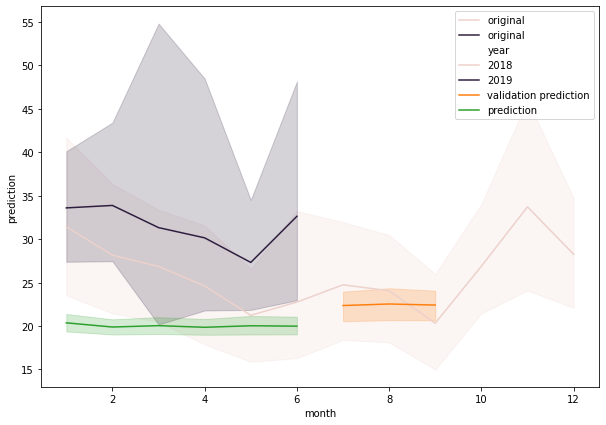

In [1555]:
plt.figure(figsize=(10,7))
sns.lineplot(x='month',y='stock_ordered',data=train.loc[train.year>=2018],hue='year',label='original',ci=100)
sns.lineplot(x='month',y='prediction',data=pd.concat((test11,test12,test13),axis=0),label='validation prediction',ci=100)
#sns.lineplot(x='month',y='prediction',data=test2,label='extraval pred')
sns.lineplot(x='month',y='prediction',data=one,label='prediction')

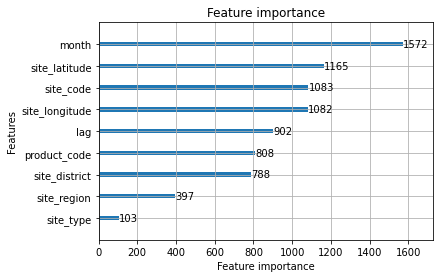

In [1556]:
lightgbm.plot_importance(lgb)

## Making submission file

In [1557]:
pd.concat((test11,test12,test13,test14),axis=0).shape,sample.shape,test1.shape

((3089, 12), (3089, 2), (3089, 11))

In [1558]:
submission=sample[['ID']]
submission=submission.merge(pd.concat((test11,test12,test13,test14),axis=0),on='ID',how='left')[['ID','prediction']]
submission.prediction=np.floor(submission.prediction)
submission.head()

,ID,prediction
0,2019 X 7 X C4001 X AS21126,2.0
1,2019 X 7 X C4001 X AS27134,26.0
2,2019 X 7 X C4001 X AS27132,9.0
3,2019 X 7 X C4001 X AS27000,26.0
4,2019 X 7 X C4001 X AS27137,9.0


In [1559]:
submission.isnull().sum(),submission.shape

(ID            0
 prediction    0
 dtype: int64,
 (3089, 2))

In [1560]:
submission.to_csv(r'C:\Users\pankaj\Desktop\indi\product_cluster.csv',index=False)

## product clustring

In [555]:
train=pd.read_csv(r'D:\Downloads\zindi\Train.csv')
train.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


In [556]:
train.dropna(inplace=True)

In [560]:
np.unique(train.product_code)

array(['AS17005', 'AS21126', 'AS27000', 'AS27132', 'AS27133', 'AS27134',
       'AS27137', 'AS27138', 'AS27139', 'AS42018', 'AS46000'],
      dtype=object)

In [588]:
dic=pd.DataFrame(index=pd.date_range('2016-01','2019-07',freq='M'))
dic2=[]
for product in np.unique(train.product_code):
    try:
        temp_val=train.loc[(train.product_code==product)].groupby(['year','month']).stock_ordered.sum().values
        dic[product]=temp_val
    except:
        dic2=train.loc[(train.product_code==product)].groupby(['year','month']).stock_ordered.sum()

In [589]:
index=['2016-2','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06']
dic2=pd.DataFrame(dic2.values,index=index,columns=['AS21126'])

In [590]:
dic=dic.join(dic2,how='left')

In [591]:
dic.fillna(0,inplace=True)

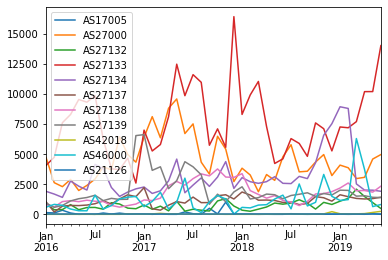

In [592]:
dic.plot()

In [593]:
dic=dic.T

from sklearn.preprocessing import Normalizer
norm=Normalizer()
dic=pd.DataFrame(norm.fit_transform(dic),index=dic.index,columns=dic.columns)

In [594]:
dic.head()

,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30
AS17005,141.0,115.0,337.0,110.0,0.0,14.0,0.0,108.0,20.0,100.0,...,0.0,9.0,4.0,9.0,13.0,0.0,10.0,3.0,50.0,0.0
AS27000,4699.0,2626.0,2296.0,2898.0,1978.0,2397.0,2929.0,3936.0,3692.0,6436.0,...,3577.0,4338.0,4960.0,3216.0,4084.0,3865.0,2966.0,3070.0,4587.0,4959.0
AS27132,892.0,374.0,396.0,803.0,382.0,564.0,572.0,424.0,963.0,855.0,...,918.0,435.0,992.0,818.0,1090.0,1323.0,2088.0,1477.0,972.0,484.0
AS27133,4067.0,4734.0,7604.0,8287.0,9531.0,9308.0,9836.0,6241.0,3783.0,3703.0,...,4812.0,7586.0,7104.0,5264.0,7250.0,7183.0,7693.0,10183.0,10187.0,14004.0
AS27134,1905.0,1681.0,1406.0,2764.0,2336.0,2015.0,4145.0,3802.0,2228.0,1484.0,...,2965.0,4279.0,6563.0,7521.0,8927.0,8788.0,2524.0,2013.0,2003.0,1913.0


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [22.5, 22.5, 54.375, 54.375],
  [95.0, 95.0, 105.0, 105.0],
  [38.4375, 38.4375, 100.0, 100.0],
  [5.0, 5.0, 69.21875, 69.21875]],
 'dcoord': [[0.0, 400.1437241792004, 400.1437241792004, 0.0],
  [0.0, 1425.3887189114412, 1425.3887189114412, 400.1437241792004],
  [0.0, 4136.822089478831, 4136.822089478831, 0.0],
  [0.0, 7971.8969093518335, 7971.8969093518335, 4136.822089478831],
  [0.0, 9489.170151634265, 9489.170151634265, 7971.8969093518335],
  [0.0, 13047.0294128587, 13047.0294128587, 9489.170151634265],
  [1425.3887189114412,
   17805.298537233237,
   17805.298537233237,
   13047.0294128587],
  [0.0, 18974.22754685945, 18974.22754685945, 0.0],
  [17805.298537233237,
   36363.42774821978,
   36363.42774821978,
   18974.22754685945],
  [0.0, 59453.535389487915, 59453.535389487915, 36363.42774821978]],
 'iv

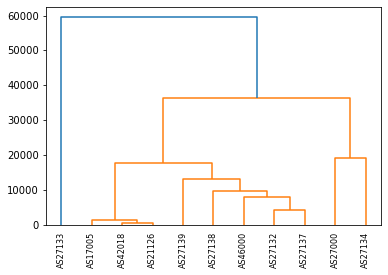

In [595]:
from scipy.cluster.hierarchy import dendrogram,fcluster,linkage
merging=linkage(dic,method='ward')
dendrogram(merging,labels=dic.index.tolist(),leaf_rotation=90,leaf_font_size=8,)

In [695]:
gr1=['AS27139','AS27138','AS46000','AS27132','AS27137']
gr2=['AS27000','AS27134']
gr3=['AS42018','AS17005','AS21126']
gr4=['AS27133']

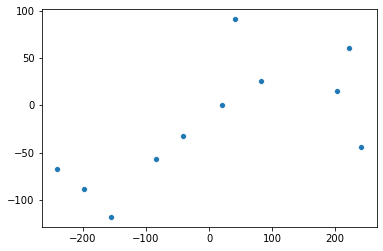

In [544]:
sns.scatterplot(x=temp[:,0],y=temp[:,1])